<a href="https://colab.research.google.com/github/Sainikithaharish06/cap-1/blob/main/NAVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("naval_vessel.csv", names=["LEVER POSITION","SHIP SPEED","GAS TURBINE SHAFT TORQUE","GAS TURBINE RATE OF REVOLUTIONS","GAS GENERATOR RATE OF REVOLUTIONS",
                          "STARBOARD PROPELLER TORQUE","PORT PROPELLER TORQUE","HP TURBINE EXIT TEMPERATURE","GT COMPRESSOR INLET AIR TEMPERATURE",
                          "GT COMPRESSOR OUTLET AIR TEMPERATURE","HP TURBINE EXIT PRESSURE","GT COMPRESSOR INLET AIR PRESSURE","GT COMPRESSOR OUTLET AIR PRESSURE",
                          "GAS TURBINE EXHAUST GAS PRESSURE","TURBINE INJECTON CONTROL","FUEL FLOW","GT COMPRESSOR DECAY STATE COEFFICIENT","GT TURBINE DECAY STATE COEFFICIENT"])
df.head(5)

,LEVER POSITION,SHIP SPEED,GAS TURBINE SHAFT TORQUE,GAS TURBINE RATE OF REVOLUTIONS,GAS GENERATOR RATE OF REVOLUTIONS,STARBOARD PROPELLER TORQUE,PORT PROPELLER TORQUE,HP TURBINE EXIT TEMPERATURE,GT COMPRESSOR INLET AIR TEMPERATURE,GT COMPRESSOR OUTLET AIR TEMPERATURE,HP TURBINE EXIT PRESSURE,GT COMPRESSOR INLET AIR PRESSURE,GT COMPRESSOR OUTLET AIR PRESSURE,GAS TURBINE EXHAUST GAS PRESSURE,TURBINE INJECTON CONTROL,FUEL FLOW,GT COMPRESSOR DECAY STATE COEFFICIENT,GT TURBINE DECAY STATE COEFFICIENT
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [3]:
df.shape

(11934, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LEVER POSITION                         11934 non-null  float64
 1   SHIP SPEED                             11934 non-null  float64
 2   GAS TURBINE SHAFT TORQUE               11934 non-null  float64
 3   GAS TURBINE RATE OF REVOLUTIONS        11934 non-null  float64
 4   GAS GENERATOR RATE OF REVOLUTIONS      11934 non-null  float64
 5   STARBOARD PROPELLER TORQUE             11934 non-null  float64
 6   PORT PROPELLER TORQUE                  11934 non-null  float64
 7   HP TURBINE EXIT TEMPERATURE            11934 non-null  float64
 8   GT COMPRESSOR INLET AIR TEMPERATURE    11934 non-null  float64
 9   GT COMPRESSOR OUTLET AIR TEMPERATURE   11934 non-null  float64
 10  HP TURBINE EXIT PRESSURE               11934 non-null  float64
 11  GT

In [5]:
df.isna().sum()

LEVER POSITION                           0
SHIP SPEED                               0
GAS TURBINE SHAFT TORQUE                 0
GAS TURBINE RATE OF REVOLUTIONS          0
GAS GENERATOR RATE OF REVOLUTIONS        0
STARBOARD PROPELLER TORQUE               0
PORT PROPELLER TORQUE                    0
HP TURBINE EXIT TEMPERATURE              0
GT COMPRESSOR INLET AIR TEMPERATURE      0
GT COMPRESSOR OUTLET AIR TEMPERATURE     0
HP TURBINE EXIT PRESSURE                 0
GT COMPRESSOR INLET AIR PRESSURE         0
GT COMPRESSOR OUTLET AIR PRESSURE        0
GAS TURBINE EXHAUST GAS PRESSURE         0
TURBINE INJECTON CONTROL                 0
FUEL FLOW                                0
GT COMPRESSOR DECAY STATE COEFFICIENT    0
GT TURBINE DECAY STATE COEFFICIENT       0
dtype: int64

In [6]:
df.describe()

,LEVER POSITION,SHIP SPEED,GAS TURBINE SHAFT TORQUE,GAS TURBINE RATE OF REVOLUTIONS,GAS GENERATOR RATE OF REVOLUTIONS,STARBOARD PROPELLER TORQUE,PORT PROPELLER TORQUE,HP TURBINE EXIT TEMPERATURE,GT COMPRESSOR INLET AIR TEMPERATURE,GT COMPRESSOR OUTLET AIR TEMPERATURE,HP TURBINE EXIT PRESSURE,GT COMPRESSOR INLET AIR PRESSURE,GT COMPRESSOR OUTLET AIR PRESSURE,GAS TURBINE EXHAUST GAS PRESSURE,TURBINE INJECTON CONTROL,FUEL FLOW,GT COMPRESSOR DECAY STATE COEFFICIENT,GT TURBINE DECAY STATE COEFFICIENT
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


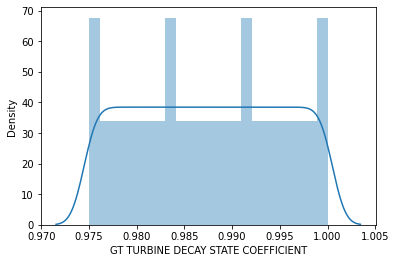

In [7]:
import seaborn as sns
sns.distplot(df['GT TURBINE DECAY STATE COEFFICIENT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


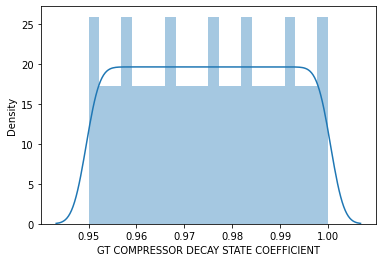

In [8]:
import seaborn as sns
sns.distplot(df['GT COMPRESSOR DECAY STATE COEFFICIENT'])
plt.show()

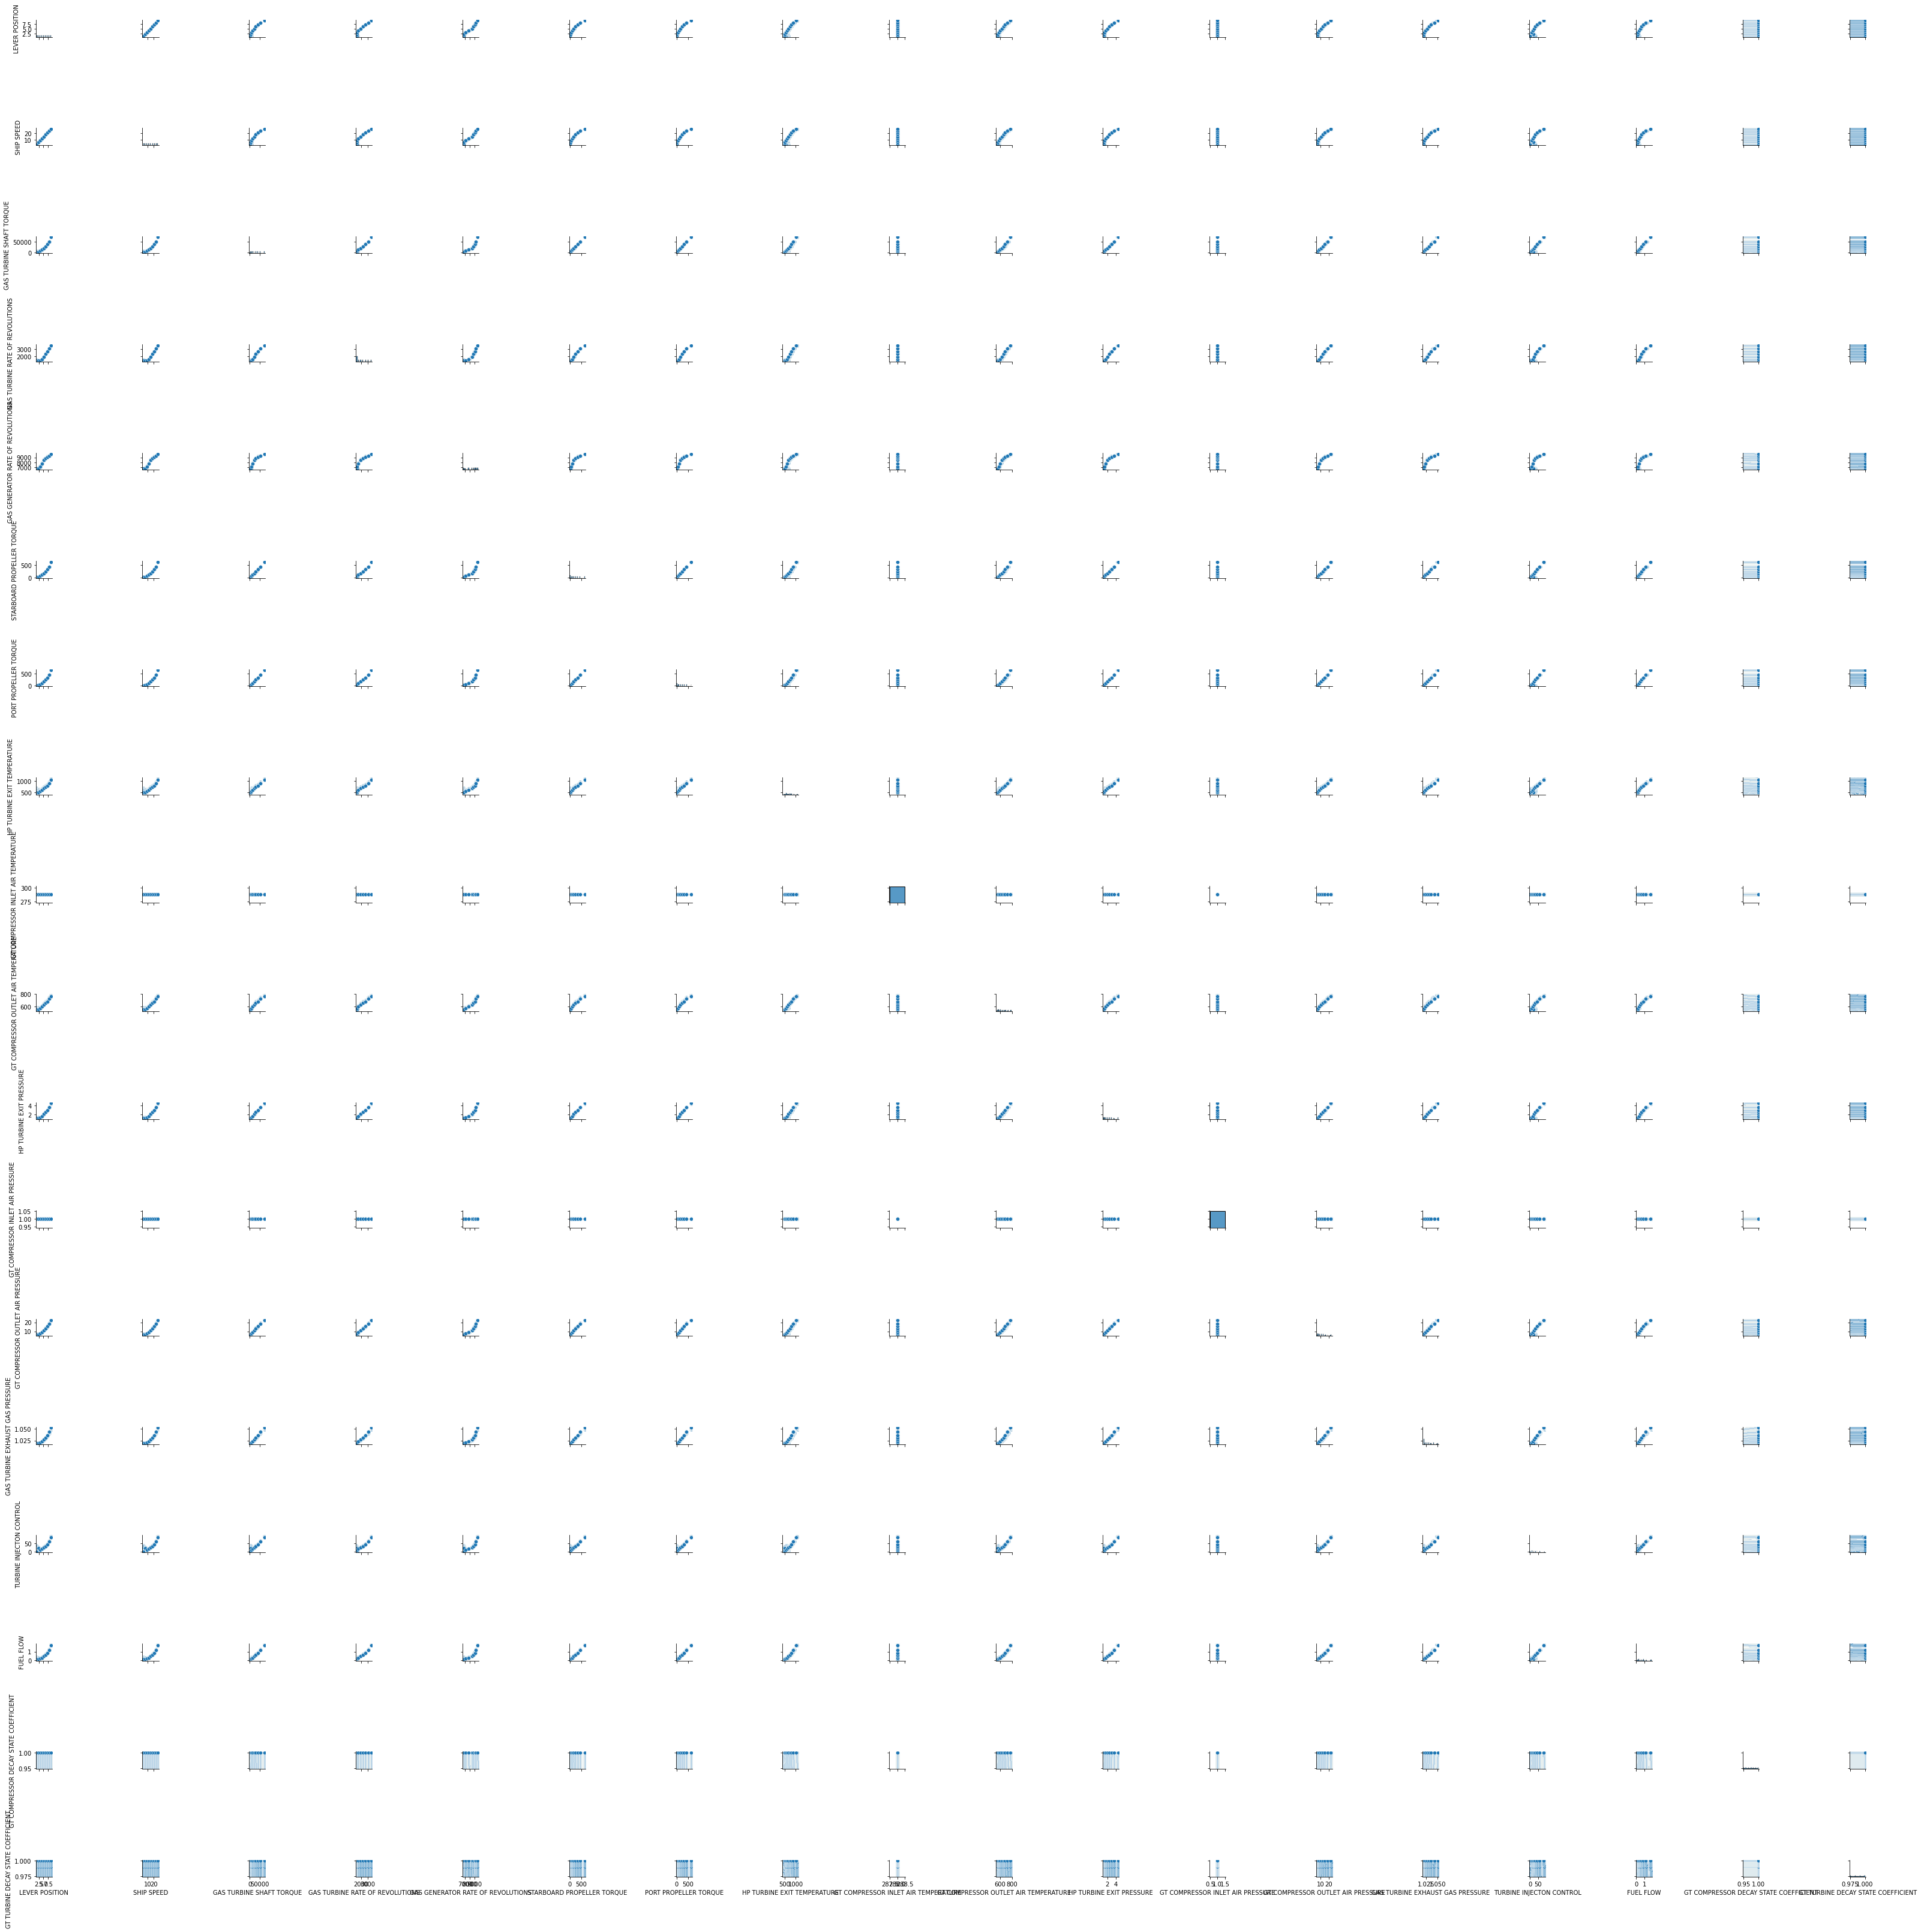

In [9]:
import seaborn as sns
sns.pairplot(df)
plt.show()

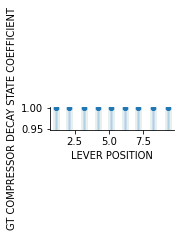

In [10]:
sns.pairplot(df,x_vars="LEVER POSITION",y_vars="GT COMPRESSOR DECAY STATE COEFFICIENT")
plt.show()

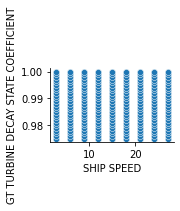

In [11]:
sns.pairplot(df,x_vars="SHIP SPEED",y_vars="GT TURBINE DECAY STATE COEFFICIENT")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


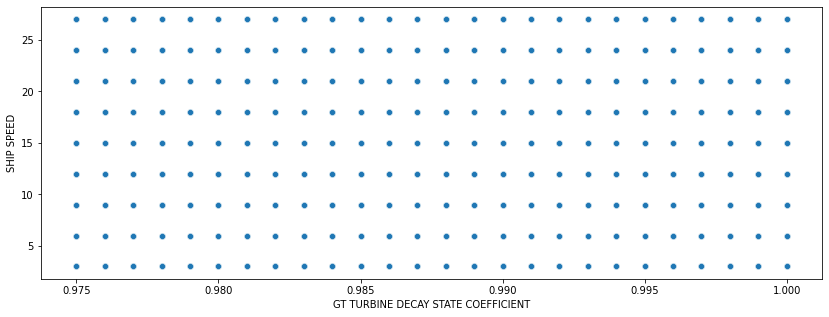

In [12]:
plt.figure(figsize=(14,5))
sns.scatterplot(df['GT TURBINE DECAY STATE COEFFICIENT'],df['SHIP SPEED'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


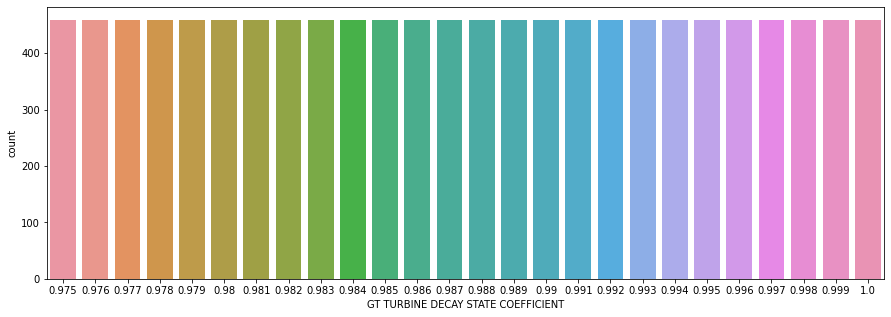

In [13]:
import seaborn as sns
plt.figure(figsize=(15,5))
sns.countplot(df['GT TURBINE DECAY STATE COEFFICIENT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


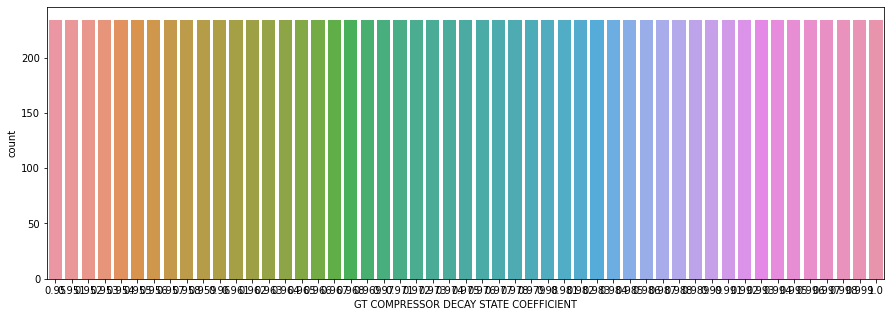

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(df['GT COMPRESSOR DECAY STATE COEFFICIENT'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

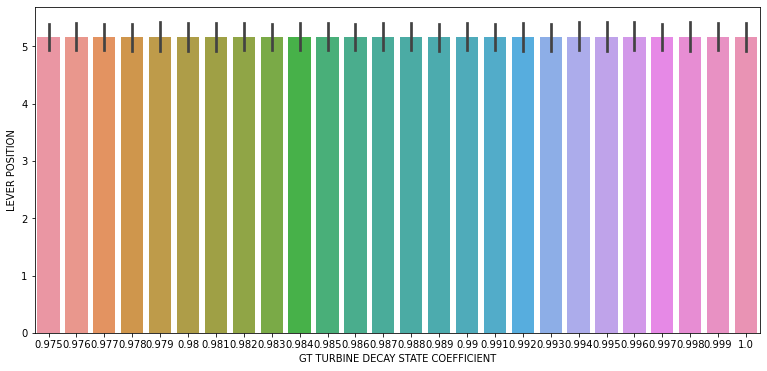

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(13,6))
sns.barplot(df['GT TURBINE DECAY STATE COEFFICIENT'],df['LEVER POSITION'])
plt.show

**CORRELATION**

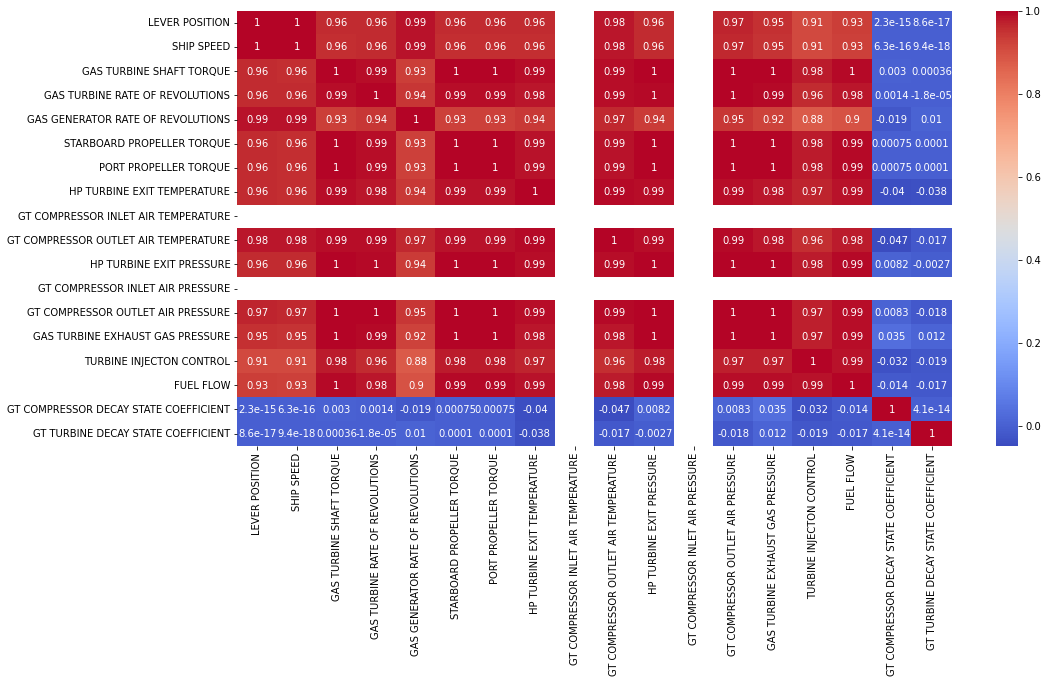

In [17]:
correlation=df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(correlation, annot=True, cmap="coolwarm")

In [18]:
df.corr()['GT TURBINE DECAY STATE COEFFICIENT'].sort_values()

HP TURBINE EXIT TEMPERATURE             -3.846390e-02
TURBINE INJECTON CONTROL                -1.887184e-02
GT COMPRESSOR OUTLET AIR PRESSURE       -1.830336e-02
FUEL FLOW                               -1.732675e-02
GT COMPRESSOR OUTLET AIR TEMPERATURE    -1.685505e-02
HP TURBINE EXIT PRESSURE                -2.718186e-03
GAS TURBINE RATE OF REVOLUTIONS         -1.776556e-05
SHIP SPEED                               9.367920e-18
LEVER POSITION                           8.566427e-17
GT COMPRESSOR DECAY STATE COEFFICIENT    4.064242e-14
STARBOARD PROPELLER TORQUE               1.044235e-04
PORT PROPELLER TORQUE                    1.044235e-04
GAS TURBINE SHAFT TORQUE                 3.576383e-04
GAS GENERATOR RATE OF REVOLUTIONS        1.000011e-02
GAS TURBINE EXHAUST GAS PRESSURE         1.179423e-02
GT TURBINE DECAY STATE COEFFICIENT       1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
GT COMPRESSOR INLET AIR PRESSURE                  NaN
Name: GT TURBINE DECAY STATE

In [19]:
df.corr()['GT COMPRESSOR DECAY STATE COEFFICIENT'].sort_values()

GT COMPRESSOR OUTLET AIR TEMPERATURE    -4.717657e-02
HP TURBINE EXIT TEMPERATURE             -3.962512e-02
TURBINE INJECTON CONTROL                -3.203662e-02
GAS GENERATOR RATE OF REVOLUTIONS       -1.883800e-02
FUEL FLOW                               -1.366765e-02
SHIP SPEED                               6.346298e-16
LEVER POSITION                           2.264405e-15
GT TURBINE DECAY STATE COEFFICIENT       4.064242e-14
STARBOARD PROPELLER TORQUE               7.535000e-04
PORT PROPELLER TORQUE                    7.535000e-04
GAS TURBINE RATE OF REVOLUTIONS          1.369908e-03
GAS TURBINE SHAFT TORQUE                 2.978258e-03
HP TURBINE EXIT PRESSURE                 8.167586e-03
GT COMPRESSOR OUTLET AIR PRESSURE        8.327871e-03
GAS TURBINE EXHAUST GAS PRESSURE         3.528524e-02
GT COMPRESSOR DECAY STATE COEFFICIENT    1.000000e+00
GT COMPRESSOR INLET AIR TEMPERATURE               NaN
GT COMPRESSOR INLET AIR PRESSURE                  NaN
Name: GT COMPRESSOR DECAY ST

**TRAIN AD TEST FIT**

# 1) GT COMPRESSOR DECAY STATE COEFICIENT

In [20]:
x= df.drop(["GT TURBINE DECAY STATE COEFFICIENT","GT COMPRESSOR DECAY STATE COEFFICIENT"],axis=1).values
y=df["GT COMPRESSOR DECAY STATE COEFFICIENT"].values

In [21]:
x

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 1.0190000e+00,
        7.1370000e+00, 8.2000000e-02],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 1.0190000e+00,
        1.0655000e+01, 2.8700000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 1.0200000e+00,
        1.3086000e+01, 2.5900000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 1.0360000e+00,
        4.2104000e+01, 8.3400000e-01],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.0430000e+00,
        5.8064000e+01, 1.1490000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.0520000e+00,
        8.6067000e+01, 1.7040000e+00]])

In [22]:
y

array([0.95, 0.95, 0.95, ..., 1.  , 1.  , 1.  ])

In [23]:
from sklearn.model_selection  import train_test_split
x1_train,x1_test,y1_train,y1_test= train_test_split(x,y,test_size=0.20,train_size=80)
x2_train,x2_test,y2_train,y2_test= train_test_split(x,y,test_size=0.25,train_size=85)
x3_train,x3_test,y3_train,y3_test= train_test_split(x,y,test_size=0.30,train_size=70)
x4_train,x4_test,y4_train,y4_test= train_test_split(x,y,test_size=0.35,train_size=65)

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)
lm.fit(x2_train,y2_train)
lm.fit(x3_train,y3_train)
lm.fit(x4_train,y4_train)


LinearRegression()

In [25]:
y1_pred=lm.predict(x1_test)
y2_pred=lm.predict(x2_test)
y3_pred=lm.predict(x3_test)
y4_pred=lm.predict(x4_test)


In [26]:
print(y1_pred)

[0.99175916 0.98849847 0.96871687 ... 0.98737123 0.96865168 0.96965509]


In [27]:
print(y2_pred)


[0.95402139 0.95147399 0.9717343  ... 0.956917   0.96748772 0.96464696]


In [28]:
print(y3_pred)

[0.98881231 0.96062212 0.9800836  ... 0.96793304 0.99223794 0.97549104]


In [29]:
print(y4_pred)

[0.98545965 0.97389294 0.9661715  ... 0.96218797 0.97779805 0.97848765]


In [30]:
lm.coef_

array([ 2.68976529e-01, -7.86899121e-02,  3.55494691e-06, -9.40268376e-06,
        5.25615399e-05, -7.72839083e-04, -7.72839081e-04, -4.02496173e-04,
        2.44110288e-14, -3.10465627e-03,  2.53488601e-03, -6.66133815e-16,
        2.33656114e-02,  4.02785244e+00, -7.97720780e-04,  4.63703022e-01])

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.7933810830360121

In [32]:
r2_score(y2_test,y2_pred)

0.8014291262244342

In [33]:
r2_score(y3_test,y3_pred)

0.7855732569459732

In [34]:
r2_score(y4_test,y4_pred)

0.7828503444895304

In [35]:
from sklearn.metrics import mean_squared_error
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))


0.006658732439525224
0.006564894681180314
0.006776173609686774
0.006882399010154646


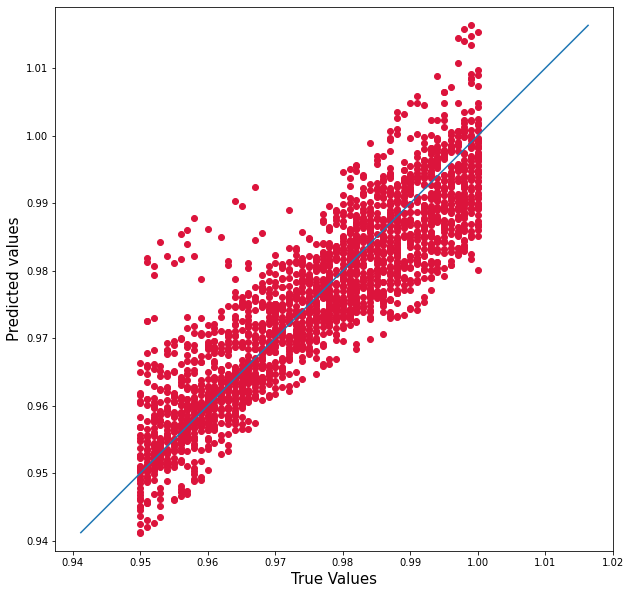

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(y1_test, y1_pred, c='crimson')
p1 = max(max(y1_pred), max(y1_test))
p2 = min(min(y1_pred), min(y1_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

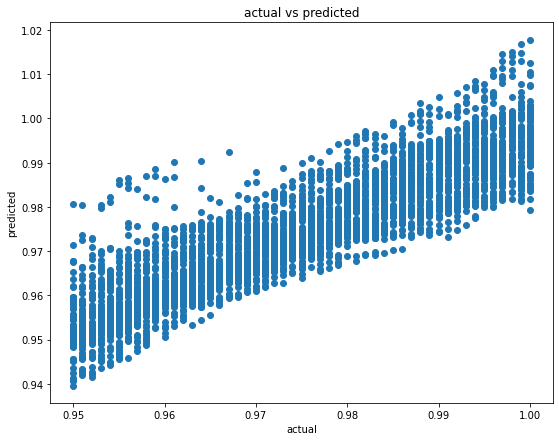

In [37]:
plt.figure(figsize=(9,7))
plt.scatter(y3_test,y3_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [38]:
linear_prediction=lm.predict(x3_test)
print("train score:{}\n".format(lm.score(x3_train,y3_train)))
print("test score:{}\n".format(lm.score(x3_test,y3_test)))
print("overall model accuracy:{}\n".format(r2_score(y3_test,linear_prediction)))
print("mean absolute error:{}\n".format(mean_absolute_error(y3_test,linear_prediction)))

train score:0.7251186013399615

test score:0.7855732569459732

overall model accuracy:0.7855732569459732

mean absolute error:0.005177436775776688



DECISION TREE


In [39]:
x=df.drop(['GT COMPRESSOR DECAY STATE COEFFICIENT'],axis=1)
y=df['GT COMPRESSOR DECAY STATE COEFFICIENT']

In [40]:
x_train,x_test, y_train, y_test=train_test_split(x, y,test_size=0.5)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5967, 17)
(5967,)
(5967, 17)
(5967,)


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

In [42]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(x_train, y_train)

DecisionTreeRegressor()

In [43]:
y_pred = DecisionTree.predict(x_test)

In [44]:
print((y_test-y_pred))

4719    0.000
9553   -0.001
2705    0.002
9779    0.000
6647    0.002
        ...  
5635    0.001
1638   -0.001
3745   -0.002
460    -0.002
5254    0.000
Name: GT COMPRESSOR DECAY STATE COEFFICIENT, Length: 5967, dtype: float64


In [45]:
MSE =  print(mean_squared_error(y_pred,y_test,squared=False))

0.0020812634262160367


In [46]:
r2_score(y_test,y_pred)

0.9798240629703723

Random forest


In [47]:
randomforest = RandomForestRegressor()
randomforest.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred=randomforest.predict(x_test)

In [49]:
MSE =  print(mean_squared_error(y_pred,y_test,squared=False))

0.0008974396573935129


In [50]:
r2_score(y_test,y_pred)

0.9962486280864944

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [52]:
GradientBoosting=GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor()

In [53]:
y_pred=GradientBoosting.predict(x_test)

In [54]:
MSE=print(mean_squared_error(y_pred,y_test,squared=False))

0.003746182956386286


In [55]:
r2_score(y_pred,y_test)

0.9070382841968359

In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [64]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

[13:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [65]:
y_pred=XGB.predict(x_test)

In [66]:
MSE = print(mean_squared_error(y_pred,y_test,squared=False))

0.004144923814672554


In [67]:
r2_score(y_pred,y_test)

0.8779210541171605

In [68]:
from sklearn.ensemble import AdaBoostRegressor


In [72]:
abc=AdaBoostRegressor()
abc.fit(x_train,y_train)

AdaBoostRegressor()

In [73]:
y_pred=abc.predict(x_test)

In [74]:
MSE = print(mean_squared_error(y_pred,y_test,squared= False))

0.013391906377612828


In [75]:
r2_score(y_pred,y_test)

-17.979216758041574

# 2) GT TURBINE DECAY STATE COEFFICIENT

In [76]:
x= df.drop(["GT TURBINE DECAY STATE COEFFICIENT","GT COMPRESSOR DECAY STATE COEFFICIENT"],axis=1).values
y=df["GT TURBINE DECAY STATE COEFFICIENT"].values

In [77]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.20,train_size=80)
x2_train,x2_test,y2_train,y2_test= train_test_split(x,y,test_size=0.25,train_size=75)
x3_train,x3_test,y3_train,y3_test= train_test_split(x,y,test_size=0.30,train_size=70)
x4_train,x4_test,y4_train,y4_test= train_test_split(x,y,test_size=0.35,train_size=65)

In [78]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x1_train,y1_train)
lm.fit(x2_train,y2_train)
lm.fit(x3_train,y3_train)
lm.fit(x4_train,y4_train)


LinearRegression()

In [79]:
y1_pred=lm.predict(x1_test)
print(y1_pred)

[1.00068996 0.98249633 0.98889302 ... 0.97975997 0.97253993 0.99792476]


In [80]:
y2_pred=lm.predict(x2_test)
print(y2_pred)

[0.97801853 0.99474254 1.00030409 ... 1.00402192 0.98466158 0.98960729]


In [81]:
y3_pred=lm.predict(x3_test)
print(y3_pred)

[0.98050694 0.98292918 0.97481176 ... 0.97769473 0.97758431 0.98324728]


In [82]:
y4_pred=lm.predict(x4_test)
print(y4_pred)

[0.99654898 0.97339016 0.9946192  ... 0.98576212 0.978388   0.97925027]


In [83]:
x

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 1.0190000e+00,
        7.1370000e+00, 8.2000000e-02],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 1.0190000e+00,
        1.0655000e+01, 2.8700000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 1.0200000e+00,
        1.3086000e+01, 2.5900000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 1.0360000e+00,
        4.2104000e+01, 8.3400000e-01],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.0430000e+00,
        5.8064000e+01, 1.1490000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.0520000e+00,
        8.6067000e+01, 1.7040000e+00]])

In [84]:
y

array([0.975, 0.975, 0.975, ..., 1.   , 1.   , 1.   ])

In [85]:
lm.coef_

array([-1.37452233e-03,  7.11727480e-03,  1.27427326e-05,  6.13672918e-05,
        2.88716685e-05, -7.54167550e-04, -7.54167551e-04, -6.40167039e-04,
        4.54768601e-16, -6.47628279e-06,  1.55986715e-01,  4.68375339e-16,
       -5.86407046e-02, -1.32593756e+00, -2.24575905e-04,  3.32075085e-01])

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2_score(y1_test,y1_pred)

0.8940373631102868

In [87]:
r2_score(y2_test,y2_pred)

0.8961581521260952

In [88]:
r2_score(y3_test,y3_pred)

0.8927863100427197

In [89]:
r2_score(y4_test,y4_pred)

0.8915177522333197

In [90]:
from sklearn.metrics import mean_squared_error
MSE1 =  print(mean_squared_error(y1_pred,y1_test,squared=False))
MSE2 =  print(mean_squared_error(y2_pred,y2_test,squared=False))
MSE3 =  print(mean_squared_error(y3_pred,y3_test,squared=False))
MSE4 =  print(mean_squared_error(y4_pred,y4_test,squared=False))


0.0024449983005879823
0.0023926456846454854
0.0024564661429869856
0.002475107946806218


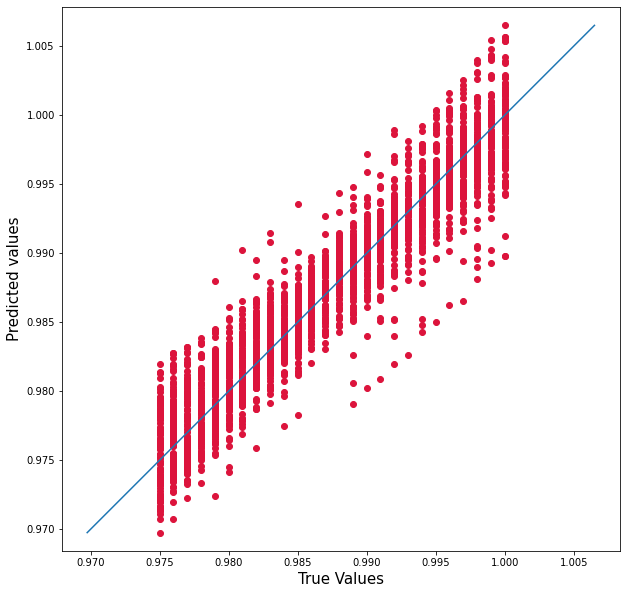

In [91]:
plt.figure(figsize=(10,10))
plt.scatter(y2_test, y2_pred, c='crimson')
p1 = max(max(y2_pred), max(y2_test))
p2 = min(min(y2_pred), min(y2_test))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted values', fontsize=15)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'actual vs predicted')

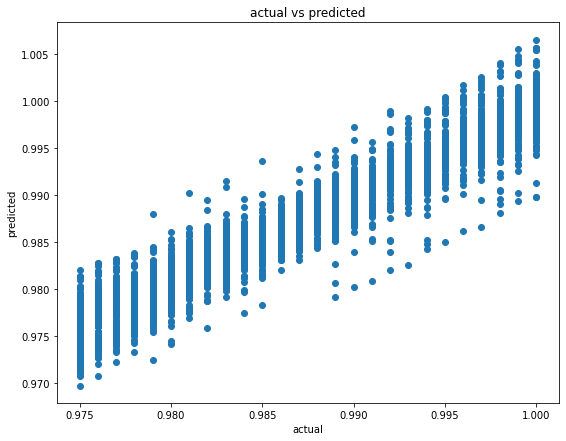

In [92]:
plt.figure(figsize=(9,7))
plt.scatter(y2_test,y2_pred)
plt.xlabel("actual")
plt.ylabel("predicted")
plt.title("actual vs predicted")

In [93]:
linear_prediction=lm.predict(x2_test)
print("train score:{}\n".format(lm.score(x2_train,y2_train)))
print("test score:{}\n".format(lm.score(x2_test,y2_test)))
print("overall model accuracy:{}\n".format(r2_score(y2_test,linear_prediction)))
print("mean squared error:{}\n".format(mean_squared_error(y2_test,linear_prediction)))

train score:0.9150209223238673

test score:0.8961581521260952

overall model accuracy:0.8961581521260952

mean squared error:5.724753372252663e-06



DECISION TREE

In [95]:
x = df.drop(['GT TURBINE DECAY STATE COEFFICIENT'],axis=1)
y = df['GT TURBINE DECAY STATE COEFFICIENT']

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)


In [97]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5967, 17)
(5967, 17)
(5967,)
(5967,)


In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

In [99]:
DecisionTree=DecisionTreeRegressor()
DecisionTree.fit(x_train,y_train)

DecisionTreeRegressor()

In [100]:
y_pred = DecisionTree.predict(x_test)

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
MSE=print(mean_squared_error(y_test,y_pred,squared=False))

0.0012471519422879783


In [103]:
r2_score(y_test,y_pred)

0.9723449889489172

In [104]:
#random forest
RandomForest= RandomForestRegressor()
RandomForest.fit(x_train,y_train)

RandomForestRegressor()

In [105]:
y_pred=RandomForest.predict(x_test)

In [106]:
MSE= print(mean_squared_error(y_test,y_pred,squared= False))



0.0006595015918019893


In [107]:
r2_score(y_pred,y_test)

0.9918987018262232

GRADIENT BOOSTING REGRESSOR

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [109]:
GradientBoosting= GradientBoostingRegressor()
GradientBoosting.fit(x_train,y_train)

GradientBoostingRegressor()

In [110]:
y_pred=GradientBoosting.predict(x_test)

In [111]:
MSE= print(mean_squared_error(y_test,y_pred,squared=False))

0.0028111363737205707


In [112]:
r2_score(y_pred,y_test)

0.7283623308432423

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [113]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)

[13:45:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [114]:
y_pred=XGB.predict(x_test)

In [115]:
MSE = print(mean_squared_error(y_pred,y_test,squared=False))

0.0032173492779534792


In [116]:
r2_score(y_pred,y_test)

0.592033993643424

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
abc=AdaBoostRegressor()
abc.fit(x_train,y_train)

AdaBoostRegressor()

In [119]:
y_pred=abc.predict(x_test)

In [120]:
MSE = print(mean_squared_error(y_pred,y_test,squared= False))

0.006899777452991684


In [121]:
r2_score(y_pred,y_test)

-9.988643981879935